# K-Nearest Neighbor

by Haifa Altalili

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from collections import defaultdict

## 1. Exploratory Data Analysis

The dataset that will be used in this notebook is the cancer dataset from the below source:
https://dq-content.s3.amazonaws.com/433/SMSSpamCollection

In [2]:
cwd = os.getcwd()
print(f'Current Working Directory: {cwd}')

file_path = os.path.join(cwd,'breast-cancer-wisconsin.data')
print(f'Path of Data File: {file_path} \n')

df = pd.read_csv( file_path, header=None)
df

Current Working Directory: /Users/haifamohamed/Documents/MBZUAI Master/Courses Material/AI701/Week 4/Lab
Path of Data File: /Users/haifamohamed/Documents/MBZUAI Master/Courses Material/AI701/Week 4/Lab/breast-cancer-wisconsin.data 



,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [3]:
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

df.columns = col_names

df.T

,0,1,2,3,4,5,6,7,8,9,...,689,690,691,692,693,694,695,696,697,698
Id,1000025,1002945,1015425,1016277,1017023,1017122,1018099,1018561,1033078,1033078,...,654546,654546,695091,714039,763235,776715,841769,888820,897471,897471
Clump_thickness,5,5,3,6,4,8,1,2,2,4,...,1,1,5,3,3,3,2,5,4,4
Uniformity_Cell_Size,1,4,1,8,1,10,1,1,1,2,...,1,1,10,1,1,1,1,10,8,8
Uniformity_Cell_Shape,1,4,1,8,1,10,1,2,1,1,...,1,1,10,1,1,1,1,10,6,8
Marginal_Adhesion,1,5,1,1,3,8,1,1,1,1,...,1,3,5,1,1,1,1,3,4,5
Single_Epithelial_Cell_Size,2,7,2,3,2,7,2,2,2,2,...,2,2,4,2,2,3,2,7,3,4
Bare_Nuclei,1,10,2,4,1,10,10,1,1,1,...,1,1,5,1,1,2,1,3,4,5
Bland_Chromatin,3,3,3,3,3,9,3,3,1,2,...,1,1,4,1,2,1,1,8,10,10
Normal_Nucleoli,1,2,1,7,1,7,1,1,1,1,...,1,1,4,1,1,1,1,10,6,4
Mitoses,1,1,1,1,1,1,1,1,5,1,...,8,1,1,1,2,1,1,2,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Id                           699 non-null    int64 
 1   Clump_thickness              699 non-null    int64 
 2   Uniformity_Cell_Size         699 non-null    int64 
 3   Uniformity_Cell_Shape        699 non-null    int64 
 4   Marginal_Adhesion            699 non-null    int64 
 5   Single_Epithelial_Cell_Size  699 non-null    int64 
 6   Bare_Nuclei                  699 non-null    object
 7   Bland_Chromatin              699 non-null    int64 
 8   Normal_Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [5]:
df.Class.value_counts()

2    458
4    241
Name: Class, dtype: int64

<AxesSubplot:>

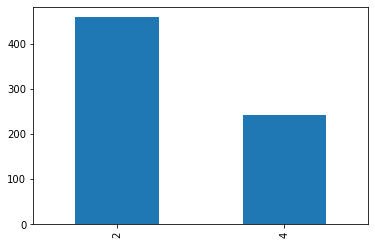

In [6]:
df.Class.value_counts().plot(kind='bar')

In [7]:
df.Clump_thickness.value_counts()

1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: Clump_thickness, dtype: int64

<AxesSubplot:>

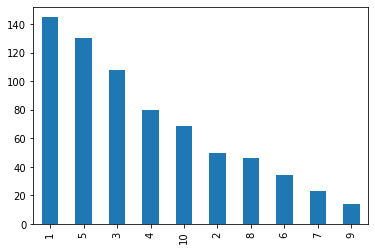

In [8]:
df.Clump_thickness.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Clump_thickness', ylabel='count'>

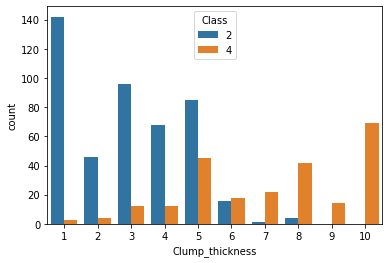

In [9]:
sns.countplot(x='Clump_thickness', hue='Class', data=df)

In [10]:
df.isna().sum()

Id                             0
Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [11]:
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')
df.dtypes

Id                               int64
Clump_thickness                  int64
Uniformity_Cell_Size             int64
Uniformity_Cell_Shape            int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_Size      int64
Bare_Nuclei                    float64
Bland_Chromatin                  int64
Normal_Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

In [12]:
df.isna().sum()

Id                              0
Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [13]:
df.Bare_Nuclei.fillna(df.Bare_Nuclei.median(), inplace=True)

In [14]:
df.isna().sum()

Id                             0
Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [15]:
# Replace label 2(benign) with 0 and label 4(malicious) with 1
df.Class = df.Class.replace([2,4],[0,1])

In [16]:
df.head().T

,0,1,2,3,4
Id,1000025.0,1002945.0,1015425.0,1016277.0,1017023.0
Clump_thickness,5.0,5.0,3.0,6.0,4.0
Uniformity_Cell_Size,1.0,4.0,1.0,8.0,1.0
Uniformity_Cell_Shape,1.0,4.0,1.0,8.0,1.0
Marginal_Adhesion,1.0,5.0,1.0,1.0,3.0
Single_Epithelial_Cell_Size,2.0,7.0,2.0,3.0,2.0
Bare_Nuclei,1.0,10.0,2.0,4.0,1.0
Bland_Chromatin,3.0,3.0,3.0,3.0,3.0
Normal_Nucleoli,1.0,2.0,1.0,7.0,1.0
Mitoses,1.0,1.0,1.0,1.0,1.0


In [17]:
df.Class.value_counts()

0    458
1    241
Name: Class, dtype: int64

In [18]:
df.shape

(699, 11)

<AxesSubplot:xlabel='Uniformity_Cell_Size', ylabel='count'>

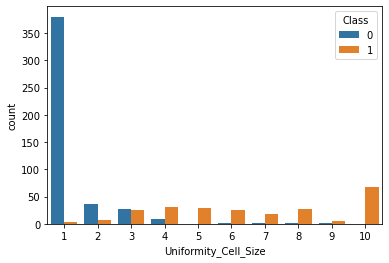

In [19]:
sns.countplot(x='Uniformity_Cell_Size', hue='Class', data=df)

<AxesSubplot:xlabel='Uniformity_Cell_Shape', ylabel='count'>

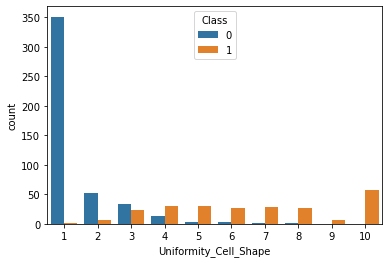

In [20]:
sns.countplot(x='Uniformity_Cell_Shape', hue='Class', data=df)

<AxesSubplot:xlabel='Marginal_Adhesion', ylabel='count'>

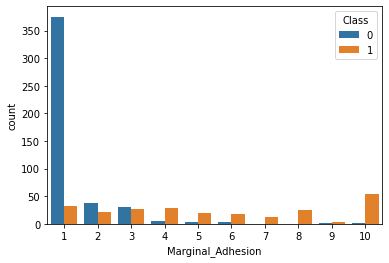

In [21]:
sns.countplot(x='Marginal_Adhesion', hue='Class', data=df)

<AxesSubplot:xlabel='Single_Epithelial_Cell_Size', ylabel='count'>

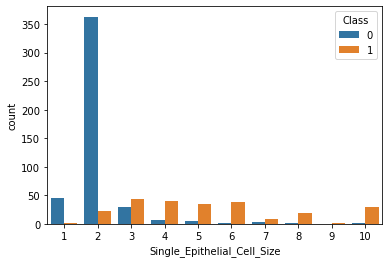

In [22]:
sns.countplot(x='Single_Epithelial_Cell_Size', hue='Class', data=df)

<AxesSubplot:xlabel='Bare_Nuclei', ylabel='count'>

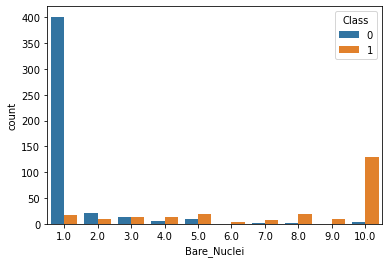

In [23]:
sns.countplot(x='Bare_Nuclei', hue='Class', data=df)

In [24]:
# Create feature matrix X
X = df.drop(['Id', 'Class'], axis=1)

# Create Target/labels vector Y
Y = df.Class

In [48]:
X.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1


In [26]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

## 2. Data Preparation before Training

### 2.1 Splitting the Data into Training and Test Sets

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

In [28]:
X_train.shape, y_train.shape

((524, 9), (524,))

In [29]:
X_test.shape, y_test.shape

((175, 9), (175,))

### 2.2 Scaling


KNN algorithm works better with feature scaling

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
X_train[:5, :]

array([[ 1.24812634, -0.05678383,  0.24996077,  2.17427112, -0.1033122 ,
         1.74827555, -0.19529829,  0.02222859, -0.31434315],
       [ 1.24812634,  0.59716622,  0.92165021, -0.29790076, -0.1033122 ,
         1.74827555,  1.04765279,  0.99287713, -0.31434315],
       [ 1.24812634,  1.5780913 ,  1.92918438,  0.40843407,  0.80652967,
         1.74827555,  1.46196982,  1.63997616, -0.31434315],
       [ 1.24812634,  0.2701912 ,  0.24996077, -0.65106817, -0.55823313,
         1.47538416, -0.19529829,  0.02222859, -0.31434315],
       [ 1.60453953,  2.23204135,  2.2650291 , -0.65106817,  3.08113433,
         1.20249278, -0.19529829,  0.02222859, -0.31434315]])

## 3. KNN Algorithm Implementation

In [32]:
def euclidean_distance(X, Y):
    """
    Computes the euclidean distance between X and Y
    """
    return np.sqrt(np.sum((Y-X)**2))

In [33]:
def vote(k_labels):
    """
    The predicted class will be the class the appeared the most in the k_labels
    
    """
    vote = defaultdict(int)
    for label in k_labels:
        vote[label] += 1
    max_votes = max(vote.values())
    
    for class_, vote_ in vote.items():
        if vote_ == max_votes:
            return class_

In [34]:
def KNN_one_step(X, feature_matrix, labels, k):
    """
    Performs KNN for one point/vector:
    1- Computes the euclidean distance to all the datapoints in the training set
    2- Sort the distances in the ascending order and the gets the first k values 
    with the corresponding classes
    3- Voting: predicts the class with the maximum number of votes
    """
    # Computes the euclidean distance between X and all the points in the dataset.
    # "distances is a list of tuples(distance, class)"
    distances = [(euclidean_distance(X,Xi), Yi) for (Xi,Yi) in zip(feature_matrix, labels)]
    # Sort the distances in the ascending order
    sorted_distances = sorted(distances, key= lambda x:x[0])
    # Get the first k labels
    k_labels = [label for (_, label) in sorted_distances[:k] ]
    # Voting for the first K values in the sorted list
    predicted_class = vote(k_labels)
    
    return predicted_class

In [35]:
def KNN_algorithm(test_data, feature_matrix, labels, k):
    """
    Performs KNN_one_step on all the test data set and provides the list of predicted 
    classes/labels
    """
    
    predicted_classes = [KNN_one_step(Xi, feature_matrix, labels, k) for Xi in test_data]
    
    return predicted_classes

In [36]:
def KNN_accuracy(y_pred, targets):
    return np.mean(y_pred == targets)

In [44]:
k_values = [3,4,5,9,10,20,30]
accuracy_list = []
for k in k_values:
    y_pred = KNN_algorithm(X_test, X_train, y_train, k)
    accuracy = KNN_accuracy(y_pred, y_test)
    accuracy_list.append(accuracy)
    print(f'KNN algorithm: k = {k}, accuracy = {accuracy}')

KNN algorithm: k = 3, accuracy = 0.96
KNN algorithm: k = 4, accuracy = 0.9828571428571429
KNN algorithm: k = 5, accuracy = 0.9771428571428571
KNN algorithm: k = 9, accuracy = 0.9657142857142857
KNN algorithm: k = 10, accuracy = 0.9657142857142857
KNN algorithm: k = 20, accuracy = 0.9657142857142857
KNN algorithm: k = 30, accuracy = 0.96


Text(0, 0.5, 'accuracy')

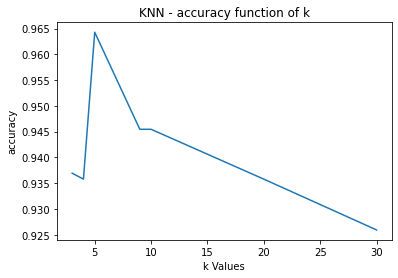

In [45]:
# plot accuracy function of k
plt.plot(k_values, f1_scores)
plt.title('KNN - accuracy function of k')
plt.xlabel('k Values')
plt.ylabel('accuracy')

**Dimensioanlity Reduction using PCA for Visialization**

In [69]:
from sklearn.decomposition import PCA

knn_pca = PCA(n_components=2, random_state=0)
X_pca = knn_pca.fit_transform(X)

accuracy: 0.9685264663805436, k: 3
accuracy: 0.9742489270386266, k: 4
accuracy: 0.9699570815450643, k: 5
accuracy: 0.9713876967095851, k: 9
accuracy: 0.9728183118741058, k: 10
accuracy: 0.9742489270386266, k: 20
accuracy: 0.9728183118741058, k: 30


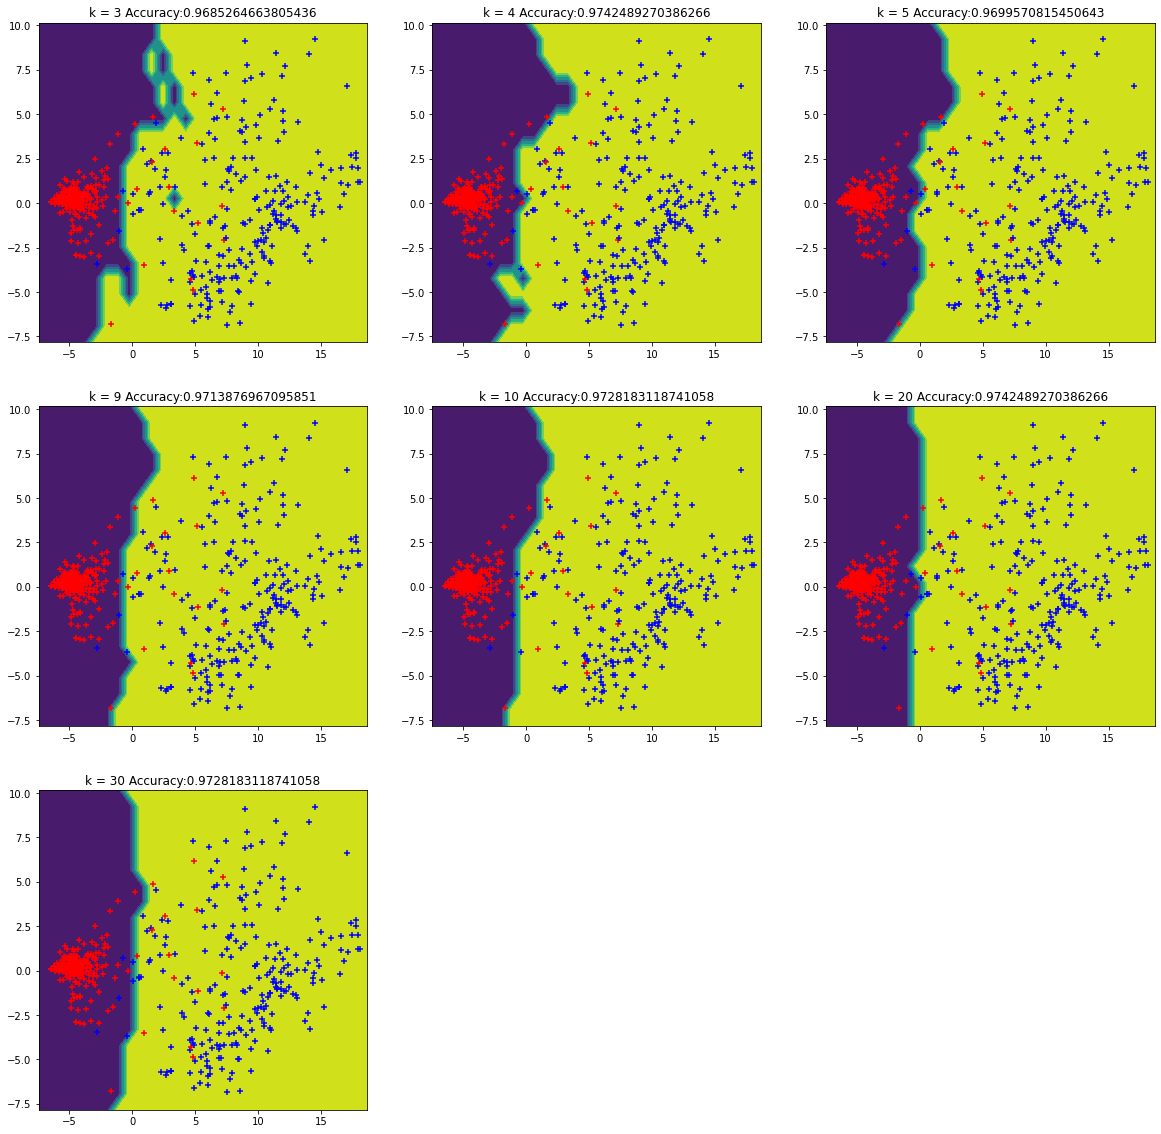

In [70]:
# Plot the decision boundary
#X_array = np.array(X_pca)
X_array = X_pca
Y_array = np.array(Y)

min1, max1 = X_array[:, 0].min() - 1, X_array[:, 0].max() + 1
min2, max2 = X_array[:, 1].min() - 1, X_array[:, 1].max() + 1

x1grid = np.arange(min1, max1, 0.9)
x2grid = np.arange(min2, max2, 0.9)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

x = np.vstack((X_array[:, 0], X_array[:, 1]))

fig = plt.figure(figsize=(20,20))
colormap = np.array(['r', 'b'])
idx = 1
for k in np.array([3,4,5,9,10,20,30]):

    cdf = pd.DataFrame({'xx': xx.reshape(-1),
                            'yy:': yy.reshape(-1)
                            })
    predicted_classes = KNN_algorithm(X_array, X_array, Y_array, k)
    cdf['prediction'] = KNN_algorithm(np.array(cdf), np.transpose(x), Y_array, k)
    accuracy = KNN_accuracy(predicted_classes, Y_array)
    print(f'accuracy: {accuracy}, k: {k}')
    plt.subplot(3,3,idx)
    plt.contourf(xx, yy, cdf['prediction'].values.reshape(xx.shape))
        
    plt.scatter(X_array[:, 0], X_array[:, 1], c=colormap[Y], marker='+')
    plt.title("k = "+ str(k) + " Accuracy:" + str(accuracy))
    idx += 1
plt.show()

In [41]:
# Using sklearn KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

f1_scores = []

for k in k_values:
    # Instantiate the classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    # fit the training data
    knn_classifier.fit(X_train, y_train)
    # predict
    ypred = knn_classifier.predict(np.array(X_test))
    accuracy = accuracy_score(ypred, y_test)
    f1 = f1_score(ypred, y_test)
    f1_scores.append(f1)
    print(f'KNN algorithm: k = {k}, accuracy = {accuracy}, f1_score = {f1}')
    
    

KNN algorithm: k = 3, accuracy = 0.96, f1_score = 0.9369369369369369
KNN algorithm: k = 4, accuracy = 0.96, f1_score = 0.9357798165137614
KNN algorithm: k = 5, accuracy = 0.9771428571428571, f1_score = 0.9642857142857142
KNN algorithm: k = 9, accuracy = 0.9657142857142857, f1_score = 0.9454545454545454
KNN algorithm: k = 10, accuracy = 0.9657142857142857, f1_score = 0.9454545454545454
KNN algorithm: k = 20, accuracy = 0.96, f1_score = 0.9357798165137614
KNN algorithm: k = 30, accuracy = 0.9542857142857143, f1_score = 0.9259259259259259


Text(0, 0.5, 'f1 score')

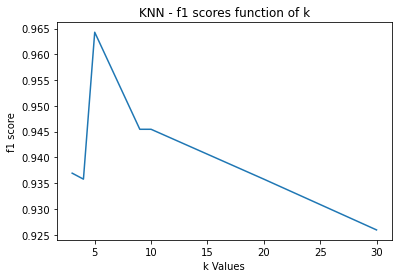

In [42]:
# Plot f1 function of k
plt.plot(k_values, f1_scores)
plt.title('KNN - f1 scores function of k')
plt.xlabel('k Values')
plt.ylabel('f1 score')

In [66]:
# Running KNN for k = 5 and different types of distances

dist_ = ['euclidean', 'chebyshev', 'cosine', 'minkowski']
f1_scores_ = []

for d in dist_:
    # Instantiate the classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=5, metric=d)
    # fit the training data
    knn_classifier.fit(X_train, y_train)
    # predict
    ypred = knn_classifier.predict(np.array(X_test))
    accuracy = accuracy_score(ypred, y_test)
    f1 = f1_score(ypred, y_test)
    f1_scores_.append(f1)
    print(f'KNN algorithm: k = 5, accuracy = {accuracy}, f1_score = {f1}')
    

KNN algorithm: k = 5, accuracy = 0.9771428571428571, f1_score = 0.9642857142857142
KNN algorithm: k = 5, accuracy = 0.9657142857142857, f1_score = 0.9464285714285715
KNN algorithm: k = 5, accuracy = 0.9828571428571429, f1_score = 0.9739130434782608
KNN algorithm: k = 5, accuracy = 0.9771428571428571, f1_score = 0.9642857142857142


Text(0, 0.5, 'f1 score')

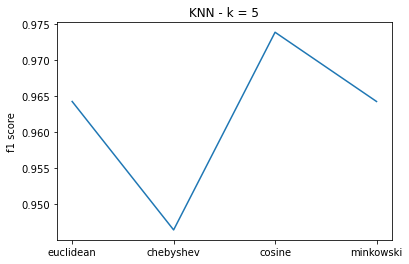

In [68]:
plt.plot(dist_, f1_scores_)
plt.title('KNN - k = 5')
plt.ylabel('f1 score')